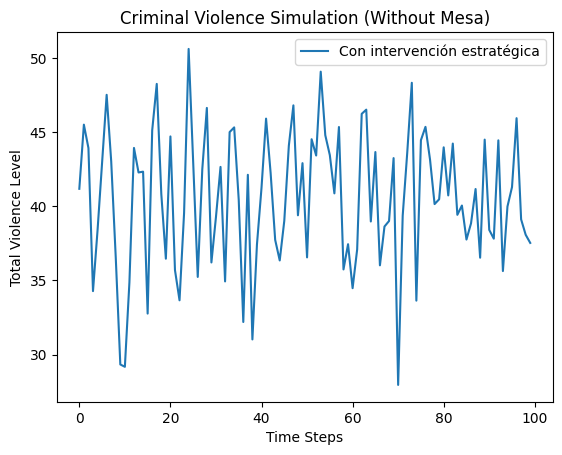

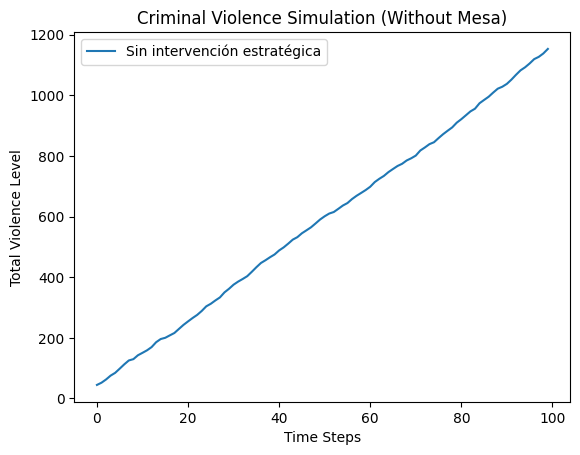

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random

class CriminalGroup:
    """Representa un grupo criminal con fuerza y agresividad, incluyendo ruido aleatorio."""

    def __init__(self, unique_id, selective_dismantling):
        self.unique_id = unique_id
        self.strength = np.random.randint(5, 20)
        self.aggression = np.random.randint(1, 10)
        self.selective_dismantling = selective_dismantling

    def step(self):
        """Define el comportamiento del grupo en cada paso con ruido aleatorio."""
        noise = np.random.normal(0, 2)

        if self.selective_dismantling and self.aggression > 5:
            # Intervención estratégica: los grupos violentos reducen su fuerza/agresividad
            self.strength *= max(0.8 + noise / 20, 0.5)
            self.aggression *= max(0.5 + noise / 10, 0.2)
        else:
            # Sin intervención: los grupos crecen de forma impredecible
            self.strength += max(1 + noise, 0)
            self.aggression += max(1 + noise / 2, 0)

class CrimeModel:
    """Simula la competencia criminal sin dependencia de 'mesa'."""

    def __init__(self, num_groups, selective_dismantling):
        self.agents = [CriminalGroup(i, selective_dismantling) for i in range(num_groups)]
        self.violence_levels = []
        self.selective_dismantling = selective_dismantling

    def step(self):
        """Ejecuta un paso de simulación activando los agentes de manera aleatoria."""
        random.shuffle(self.agents)  # Activación aleatoria
        for agent in self.agents:
            agent.step()
        self.violence_levels.append(sum(agent.aggression for agent in self.agents))

def run_simulation(steps, num_groups, selective_dismantling):
    """Ejecuta la simulación y visualiza los resultados."""
    model = CrimeModel(num_groups, selective_dismantling)

    for _ in range(steps):
        model.step()

    label = "Con intervención estratégica" if selective_dismantling else "Sin intervención estratégica"
    plt.plot(model.violence_levels, label=label)
    plt.xlabel("Time Steps")
    plt.ylabel("Total Violence Level")
    plt.title("Criminal Violence Simulation (Without Mesa)")
    plt.legend()
    plt.show()

# Ejecutar la simulación con y sin intervención
run_simulation(100, 10, True)  # Con intervención estratégica
run_simulation(100, 10, False) # Sin intervención estratégica